Including the required libraries. Downloading the MNIST dataset from the keras library

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from keras.datasets import mnist

Loading the training and testing data for the mnist dataset

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


Checking the amount of training and testing data available

In [13]:
print('The training set contains: ', len(x_train))
print('test set: ', len(x_test))

The training set contains:  60000
test set:  10000


Determining the shape of the training data and training label

In [14]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


Performing the required preprocessing on the training and testing data. Reshaping the training data and testing data such that all the images are flattened into column and each column of the dataset X represents one training example. Additionally, normalizing the training and testing data by dividing each pixel value in the dataset by 255.  Reshaping the training and testing label to a row vector. The last digit of my student ID = 0, thus modifying the labels of the training and testing data to contain value 1 for an image containing the number 0 and a value of 0 otherwise. Additionally, printing the shapes of the training and testing data and labels to confirm correct preprocessing.

In [15]:
# Performing the preprocessing steps on the data set
# Reshaping the training and test set such that each column represents an image
# Reshaping the training and test labels into row vectors
x_train = np.reshape(x_train, (60000, -1))
x_train = x_train.T
y_train = np.reshape(y_train, (1, -1))
x_test = np.reshape(x_test, (10000, -1))
x_test = x_test.T
y_test = np.reshape(y_test, (1, -1))
# Normalizing the data in training and test sets
x_train = x_train/255
x_test = x_test/255
# Updating the labels in the training and test set
# Last digit of my student id = 0
# Thus, the label of an image of number 0 should be 1 and 0 otherwise
# This is achieved by creating masks for the training and testing labels such that the masks have True for indices
# which correspond to an image of number 0
id_mask_train = y_train == 0
id_mask_test = y_test == 0
y_train[id_mask_train] = 1
y_train[np.logical_not(id_mask_train)] = 0
y_test[id_mask_test] = 1
y_test[np.logical_not(id_mask_test)] = 0
# Checking the shape of the training and test sets
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(784, 60000)
(784, 10000)
(1, 60000)
(1, 10000)


A function to computing the sigmoid for an input parameter

In [16]:
def activation_sigmoid(z):
    activ = 1/(1 + np.exp(-z))
    return activ

Class for performing the Logistic Regression. The constructor method (__init__) loads and splits the training data into training + validation dataset. Additionally, it initializes the weights and the bias with random values. 

The method train_model, trains the model on the training set, starting with random weights and bias and performing the gradient descent for each value of alpha in the list provided during class initialization. From these the method tests each trained model with different alpha value by testing it on the validation set. The value of alpha which provides the least cost on the validation set is selected and used for training the model starting with random weights and bias and performing the gradeint descent algorithm. The number of epochs (iterations for the gradient descent algorithm) was set to 6000, after trying the values 1000, 2000, 3000, 5000, 6000, and 7000. The accuracy for 6000 epochs vs 7000 epochs was virtually identical and thus I used 6000 epochs.

The method test_model, tests the trained model in the training step on the untouched test dataset, thus providing the performance of the trained model on previoulsy unseen data. 

In [19]:
class logisticRegression :
    def __init__(self, x_train, y_train, x_test, y_test, alpha):
        self.x_train = x_train[:, :48000]
        self.y_train = y_train[:, :48000]
        self.x_test = x_test
        self.y_test = y_test
        self.alpha = alpha
        self.x_val = x_train[:, 48000:]
        self.y_val = y_train[:, 48000:]
        self.w = np.random.random((self.x_train.shape[0],1))
        self.b = np.random.random()
        self.m = self.x_train.shape[1]
        
    def train_model(self):
        # Checking to see if a single value of alpha is provided or if multiple values are provided. 
        # If multiple values are provided then the best learning rate is selected by cross validation
        if len(self.alpha)>1:
            # To hold the cost of models learned by various alpha values
            cost_val = []
            # Looping over all the learning rates to determine the best one
            for j in self.alpha:
                print('Cross Validation for alpha = ', j)  
                # Performing gradient descent to update the weights and bias of the model. The number of epochs is set  to 6000
                # after experimenting with different values including 1000, 2000, 3000, 5000, 5000, 7000.
                for i in range(6000):
                    # Computing the affine transformation
                    Z = self.w.T.dot(self.x_train) + self.b
                    # Computing the sigmoid activation of Z
                    A = activation_sigmoid(Z)
                    
                    # Computing the vectorized cost function
                    logA = np.log(A)
                    log1_A = np.log(1 - A)
                    cost = - np.sum(self.y_train * logA + (1 - self.y_train) * log1_A) / self.m

                    # Computing the gradients 
                    dZ = A - self.y_train
                    dw = self.x_train.dot(dZ.T) / self.m
                    db = np.sum(dZ)/self.m

                    # Updating the weights and the bias
                    self.w -= j * dw
                    self.b -= j * db

                # Computing the cost for the images in the validation set
                # Computing the affine transformation
                zval = self.w.T.dot(self.x_val) + self.b
                # Computing the sigmoid activation value
                Aval = activation_sigmoid(zval)
                logAval = np.log(Aval)
                log1_Aval = np.log(1 - Aval)
                # Determining the cost on the validation set for the current learned model
                cval = -np.sum(self.y_val * logAval + (1 - self.y_val)* log1_Aval)/self.x_val.shape[1]
                # Appending the cost to the list containing cost for different alpha values on the validation set
                cost_val.append(cval)
                print('Cost for alpha = ', j, '= ', cval)
                # Initializing weights randomly for the training with the next alpha value
                self.w = np.random.random((self.x_train.shape[0],1))
                self.b = np.random.random()

            # Selecting the alpha value with the minimum cost on the validation set
            alpha = self.alpha[cost_val.index(min(cost_val))]
        else:
            alpha = self.alpha[0]
        print('The best learning rate = ', alpha)
        print('Training the model using alpha = ' ,alpha)
        self.w = np.random.random((self.x_train.shape[0],1))
        self.b = np.random.random()
        # Training the model using gradient descent with 6000 iterations
        for i in range(6000):
            Z = self.w.T.dot(self.x_train) + self.b
            A = activation_sigmoid(Z)

            logA = np.log(A)
            log1_A = np.log(1 - A)
            cost = - np.sum(self.y_train * logA + (1 - self.y_train) * log1_A) / self.m

            dZ = A - self.y_train
            dw = self.x_train.dot(dZ.T) / self.m
            db = np.sum(dZ)/self.m

            self.w -= alpha * dw
            self.b -= alpha * db
            
            # Ploting the learning curve - the cost vs the iterations
            plt.plot(i, cost, 'bo')
            plt.xlabel('Iterations for Gradient Descent')
            plt.ylabel('Cost function')
            plt.title('Learning Curve')
        
        print('The training error = ', cost)
        # Rounding the prediction values to the nearest integer
        Apred = np.around(A)
        # Computing the accuracy on the training dataset of the trained model
        accuracy = np.mean(Apred == self.y_train)
        print('The Training accuracy = ', accuracy)
        return self.w, self.b
    
    def test_model(self):
        # Performing the prediction on the test dataset using the trained model
        ztest = self.w.T.dot(self.x_test) + self.b
        Atest = activation_sigmoid(ztest)
        
        # Computing the cost on the test dataset
        logA_test = np.log(Atest)
        log1_Atest = np.log(1 - Atest)
        cost_test = - np.sum(self.y_test * logA_test + (1 - self.y_test)* log1_Atest)/self.x_test.shape[1]
        print('The testing error  = ', cost_test)
        # Rounding the prediction values to the nearest integer
        Apred = np.around(Atest)
        # Computing the accuracy on the test dataset of the trained model
        accuracy = np.mean(Apred == self.y_test)
        print('Testing accuracy = ', accuracy)

Creating an object of the class for performing the logistic regression on the MNIST dataset. The various values of the alpha used for checking 5, 2, 1, 0.5, 0.2, 0.1. When the class method train_data is called, it determines the best learning rate from all provided as parameter during class initialization. Then using the best learning rate (which provides the minimum cost), the model is trained and the closed is plotted vs the iterations (epochs) of the gradient descent algorithm.


Training Mode
Cross Validation for alpha =  5


C:\Users\shrey\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log
C:\Users\shrey\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in multiply


Cost for alpha =  5 =  0.025280193789209208
Cross Validation for alpha =  2
Cost for alpha =  2 =  0.024563777874491228
Cross Validation for alpha =  1
Cost for alpha =  1 =  0.025258516704746853
Cross Validation for alpha =  0.5
Cost for alpha =  0.5 =  0.026332561386352385
The best learning rate =  2
Training the model using alpha =  2


C:\Users\shrey\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:75: RuntimeWarning: divide by zero encountered in log
C:\Users\shrey\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in multiply


The training error =  0.022221658814956618
The Training accuracy =  0.9934375

Testing Mode
The testing error  =  0.025043834704278557
Testing accuracy =  0.9918
The Learning Curve is given as below:


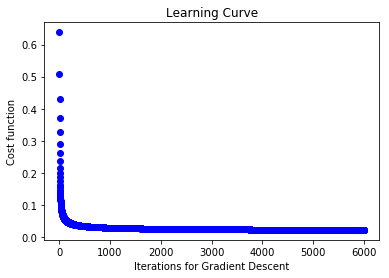

In [20]:
alpha = [5, 2, 1, 0.5]
#alpha = [2]
ID_notID = logisticRegression(x_train, y_train, x_test, y_test, alpha)
print('\nTraining Mode')
w, b = ID_notID.train_model()
print('\nTesting Mode')
ID_notID.test_model()
print('The Learning Curve is given as below:')

Testing the trained model on random test images, one which is not 0 and another one which is a 0; and returning the prediction without rounding it. As it can be seen, for the ground truth value = 0, the prediction is extremely small (5 x 10^-8).

Similarly, for the ground truth value = 1, the prediction = 0.999, which is very close to 1. Thus, the model is working well. 

In [21]:
Z_test_78 = w.T.dot(x_test[:, 78]) + b
A_test_78 = activation_sigmoid(Z_test_78)
print("Prediction : ", A_test_78)
print('Ground Truth: ', y_test[0, 78])

Prediction :  [5.24796005e-08]
Ground Truth:  0


Ground Truth:  1
prediction:  [0.99904722]


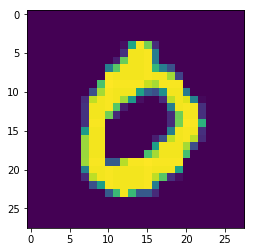

In [22]:
print('Ground Truth: ',y_test[0,3])
z_test_3 = w.T.dot(x_test[:,3]) + b
A = activation_sigmoid(z_test_3)
print('prediction: ', A)
plt.imshow(np.reshape(x_test[:, 3], (28, 28)))